In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [2]:
TEST_DATA = 'test.csv'
TRAIN_DATA = 'train.csv'

In [3]:
train_df = pd.read_csv(TRAIN_DATA)
test_df = pd.read_csv(TEST_DATA)
train_df.shape

(7352, 563)

In [4]:
print(*(f'{c}\n' for c in train_df.columns))

tBodyAcc-mean()-X
 tBodyAcc-mean()-Y
 tBodyAcc-mean()-Z
 tBodyAcc-std()-X
 tBodyAcc-std()-Y
 tBodyAcc-std()-Z
 tBodyAcc-mad()-X
 tBodyAcc-mad()-Y
 tBodyAcc-mad()-Z
 tBodyAcc-max()-X
 tBodyAcc-max()-Y
 tBodyAcc-max()-Z
 tBodyAcc-min()-X
 tBodyAcc-min()-Y
 tBodyAcc-min()-Z
 tBodyAcc-sma()
 tBodyAcc-energy()-X
 tBodyAcc-energy()-Y
 tBodyAcc-energy()-Z
 tBodyAcc-iqr()-X
 tBodyAcc-iqr()-Y
 tBodyAcc-iqr()-Z
 tBodyAcc-entropy()-X
 tBodyAcc-entropy()-Y
 tBodyAcc-entropy()-Z
 tBodyAcc-arCoeff()-X,1
 tBodyAcc-arCoeff()-X,2
 tBodyAcc-arCoeff()-X,3
 tBodyAcc-arCoeff()-X,4
 tBodyAcc-arCoeff()-Y,1
 tBodyAcc-arCoeff()-Y,2
 tBodyAcc-arCoeff()-Y,3
 tBodyAcc-arCoeff()-Y,4
 tBodyAcc-arCoeff()-Z,1
 tBodyAcc-arCoeff()-Z,2
 tBodyAcc-arCoeff()-Z,3
 tBodyAcc-arCoeff()-Z,4
 tBodyAcc-correlation()-X,Y
 tBodyAcc-correlation()-X,Z
 tBodyAcc-correlation()-Y,Z
 tGravityAcc-mean()-X
 tGravityAcc-mean()-Y
 tGravityAcc-mean()-Z
 tGravityAcc-std()-X
 tGravityAcc-std()-Y
 tGravityAcc-std()-Z
 tGravityAcc-mad()-X
 tGravi

In [5]:
train_df['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [6]:
train_df['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

<AxesSubplot:>

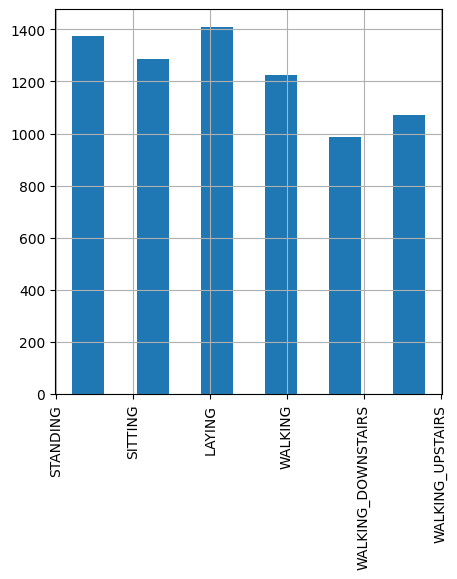

In [7]:
train_df['Activity'].hist(xrot=90, bins=6, figsize=(5,5), rwidth=0.5)

In [8]:
# remove laying and walking data
train_df = train_df[~train_df['Activity'].isin(['LAYING', 'WALKING'])]
test_df = test_df[~test_df['Activity'].isin(['LAYING', 'WALKING'])]

train_df.shape

(4719, 563)

<AxesSubplot:>

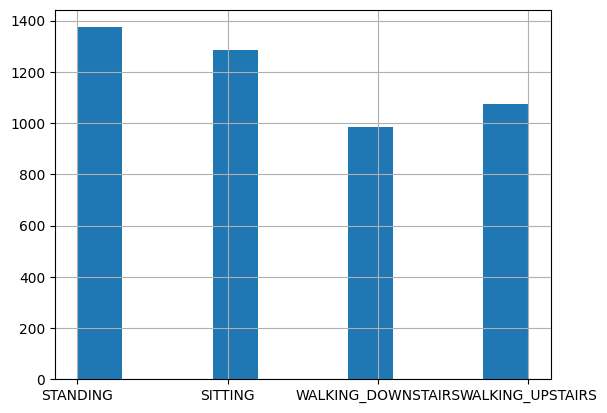

In [9]:
train_df['Activity'].hist()

In [10]:
train_df = train_df[[
    'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X',
    'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y',
    'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
    
    'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
    
    'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z', 'tBodyGyro-std()-X',
    'tBodyGyro-std()-Y', 'tBodyGyro-std()-Z', 'tBodyGyro-max()-X', 'tBodyGyro-max()-Y',
    'tBodyGyro-max()-Z', 'tBodyGyro-min()-X', 'tBodyGyro-min()-Y', 'tBodyGyro-min()-Z',
    
    'tBodyGyro-mad()-X', 'tBodyGyro-mad()-Y', 'tBodyGyro-mad()-Z',
    
    'Activity'
]]

test_df = test_df[[
    'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X',
    'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y',
    'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z',
    
    'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
    
    'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z', 'tBodyGyro-std()-X',
    'tBodyGyro-std()-Y', 'tBodyGyro-std()-Z', 'tBodyGyro-max()-X', 'tBodyGyro-max()-Y',
    'tBodyGyro-max()-Z', 'tBodyGyro-min()-X', 'tBodyGyro-min()-Y', 'tBodyGyro-min()-Z',
    
    'tBodyGyro-mad()-X', 'tBodyGyro-mad()-Y', 'tBodyGyro-mad()-Z',
    
    'Activity'
]]
train_df.shape

(4719, 31)

In [11]:
X_train = train_df.iloc[:, :-1]
y_train = train_df[['Activity']]

X_test = test_df.iloc[:, :-1]
y_test = test_df[['Activity']]

In [12]:
le = preprocessing.LabelEncoder()
le.fit(y_train['Activity'].unique().tolist())

LabelEncoder()

In [13]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/Users/nguyenvanbinh/Desktop/hardware-ai/venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
y_train

array([1, 1, 1, ..., 3, 3, 3])

In [15]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [16]:
input_size = 30
hidden_size = 400
num_classes = 4
num_epochs = 64
batch_size = 64
learning_rate = 0.001
device = torch.device('cpu')

In [17]:
class HarDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __getitem__(self, index):
        return torch.Tensor(self.X.iloc[index].astype(float)), self.y[index]
    
    def __len__(self):
        return len(self.X)

In [18]:
train_dataset = HarDataset(X_train, y_train)
test_dataset = HarDataset(X_test, y_test)

train_loader = DataLoader(
    dataset=train_dataset, 
    batch_size=batch_size, 
    shuffle=True
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

In [19]:
class FCN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FCN, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out) 
        return out

In [20]:
model = FCN(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

def test_accuracy():
    y_pred = []
    y_true = []
    
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        for data, labels in test_loader:
            labels = labels.to(device)
            y_true.extend(labels)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            y_pred.extend(predicted)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()

        acc = 100.0 * n_correct / n_samples
        print(f'Accuracy on test set: {acc:.4f}%')
        
        cf_mat = confusion_matrix(y_true, y_pred)
        cm_df = pd.DataFrame(cf_mat, index=[i for i in range(num_classes)], columns=[i for i in range(num_classes)])
        plt.figure(figsize=(4,3))
        sb.heatmap(cm_df, annot=True)

Before training
Accuracy on test set: 24.2424%


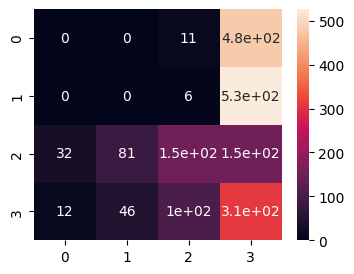

In [22]:
print('Before training')
test_accuracy()

In [23]:
n_total_steps = len(train_loader)
n_total_steps

74

In [24]:
for epoch in range(num_epochs):
    for i, (data, label) in enumerate(train_loader):
        label = label.to(device)
        output = model(data)
        loss = criterion(output, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch {epoch+1}/{num_epochs}: loss = {loss.item():.4f}')

Epoch 1/64: loss = 0.6666
Epoch 2/64: loss = 0.4396
Epoch 3/64: loss = 0.4782
Epoch 4/64: loss = 0.5529
Epoch 5/64: loss = 0.5282
Epoch 6/64: loss = 0.3865
Epoch 7/64: loss = 0.3933
Epoch 8/64: loss = 0.4211
Epoch 9/64: loss = 0.4571
Epoch 10/64: loss = 0.3979
Epoch 11/64: loss = 0.3987
Epoch 12/64: loss = 0.3868
Epoch 13/64: loss = 0.4618
Epoch 14/64: loss = 0.3838
Epoch 15/64: loss = 0.3896
Epoch 16/64: loss = 0.3870
Epoch 17/64: loss = 0.3909
Epoch 18/64: loss = 0.3197
Epoch 19/64: loss = 0.2900
Epoch 20/64: loss = 0.3753
Epoch 21/64: loss = 0.3577
Epoch 22/64: loss = 0.3949
Epoch 23/64: loss = 0.2997
Epoch 24/64: loss = 0.3321
Epoch 25/64: loss = 0.4389
Epoch 26/64: loss = 0.3101
Epoch 27/64: loss = 0.3272
Epoch 28/64: loss = 0.3364
Epoch 29/64: loss = 0.2869
Epoch 30/64: loss = 0.4534
Epoch 31/64: loss = 0.2264
Epoch 32/64: loss = 0.1954
Epoch 33/64: loss = 0.3627
Epoch 34/64: loss = 0.3534
Epoch 35/64: loss = 0.3245
Epoch 36/64: loss = 0.2892
Epoch 37/64: loss = 0.2905
Epoch 38/6

After training
Accuracy on test set: 88.6102%


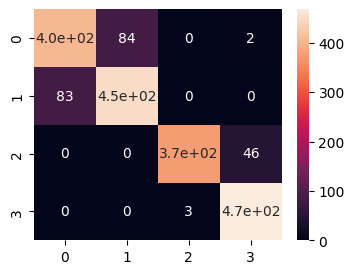

In [25]:
print('After training')
test_accuracy()